## Project Overview
The Artificial Intelligence module coursework delves into the research and development of machine learning models in a specific problem domain. In this coursework, research on dataset, exploration data analysis, data preprocessing and model development and evaluation of the chosen machine learning models for a problem domain in sentiment analysis of the product reviews.

## Sentiment Analysis on Amazon Product Reviews Using Machine Learning

The goal of this project is to develop a machine learning-based sentiment analysis system capable of classifying customer reviews into positive, negative, and neutral categories. By leveraging different vectorization techniques, and experimenting with algorithms such as Naive Bayes, Support Vector Machines (SVM), and Logistic Regression, this project aims to provide actionable insights into customer sentiment.

### Import Required Libraries

In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
import contractions
from textblob import TextBlob
import nltk
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config

from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, classification_report, accuracy_score, roc_curve

In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load dataset

In [9]:
#the dataset is in josnl file
df = pd.read_json(r'C:\Users\nepal\Desktop\AI\All_Beauty.jsonl', lines=True)

In [10]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [12]:
df.tail(5)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
701523,4,Four Stars,Conditioner is great shampoo not as I expected,[],B006YUIWKA,B006YUIWKA,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,2016-11-04 02:37:01.000,0,True
701524,1,Pretty,Did not work! Used the whole bottle and my hai...,[],B006YUIWKA,B006YUIWKA,AFV7YZFOJF564EZGET5LG45K4QEA,2016-12-05 03:32:10.000,0,False
701525,5,Great sunless tanner,Product as expected. Shipping was on time.,[],B06ZZV9MZT,B06ZZV9MZT,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,2020-05-27 02:52:54.067,0,True
701526,5,The Crown on top is a Ring!!!,"Not only is it a delicious fragrance, but also...",[],B000HB6VLE,B000HB6VLE,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,2007-07-18 22:36:49.000,4,False
701527,4,Good Shampoo/Conditioner,The conditioner doesn't really make your hair ...,[],B0093MXHFG,B0093MXHFG,AGIYQU6RK6TBKBCMWKVPBPBMMJNA,2013-04-26 02:48:06.000,1,True


## Exploratory Data Analysis

In [14]:
# Check for null values in the dataset
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [15]:
# Check for null values in the dataset
print("Description of the dataset")
print(df.info())

Description of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 48.8+ MB
None


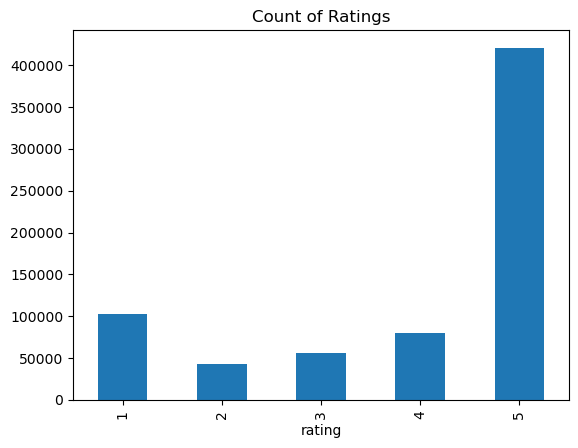

In [16]:
ax = df['rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Ratings')

The dataset is very baised to positive ratings.The assumptions for this dataset is that rating with 5 means the text is positive, 3 is neutral and 1 is negative.

In [18]:
print (df['text'][50])

Great multi pack of bands for a great price. They wash well in the laundry and don't lose any elasticity


### Create Sentiment Labels
A new column is created with sentiment based on the rating. For simplicity, we'll consider ratings 4.0 and above as positive and ratings below 4.0 as negative.

In [20]:
# function to define sentiment labels based on rating
def get_sentiment(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating == 3.0:
        return 'neutral'
    else:
        return 'negative'

### Apply Sentiment Labeling

In [22]:
# Apply the labeling function to the dataset
df['sentiment'] = df['rating'].apply(get_sentiment)

# Check distribution of sentiments
print(df['sentiment'].value_counts())

sentiment
positive    500107
negative    145114
neutral      56307
Name: count, dtype: int64


### Understanding distribution

The dataset is significantly imbalanced, with a much higher count of positive sentiments compared to negative and neutral. This imbalance can cause models to:
- Predict the majority class (positive) more often, ignoring minority classes (neutral and negative).
- Create misleadingly high accuracy because they perform well on the dominant class but poorly on underrepresented ones.

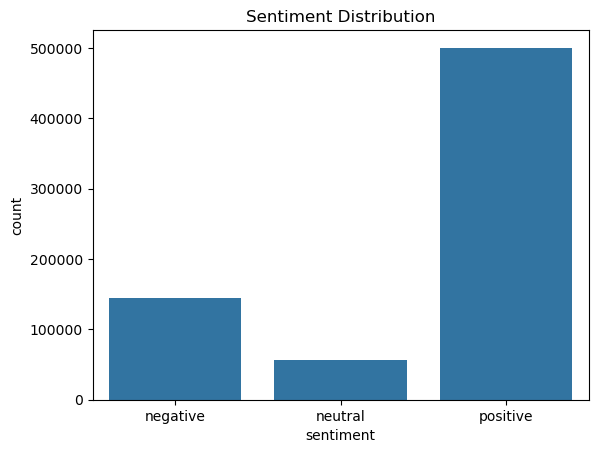

In [25]:
# Visualize the sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='sentiment', order=['negative', 'neutral', 'positive'])
plt.title("Sentiment Distribution")
plt.show()

### Visualization with Word Cloud

In [27]:
# Function to generate a word cloud
def generate_word_cloud(data, sentiment):
    text = ' '.join(data[data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment", fontsize=16)
    plt.axis('off')
    plt.show()

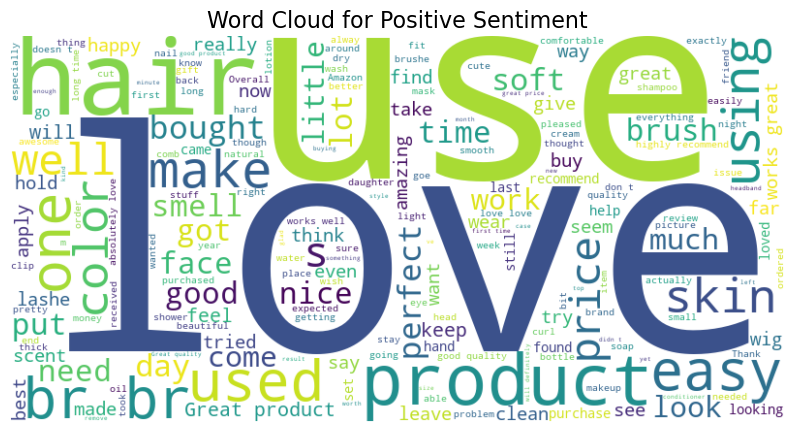

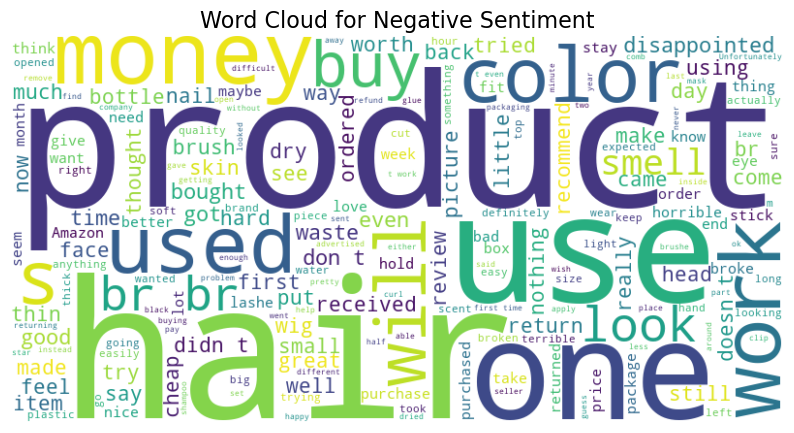

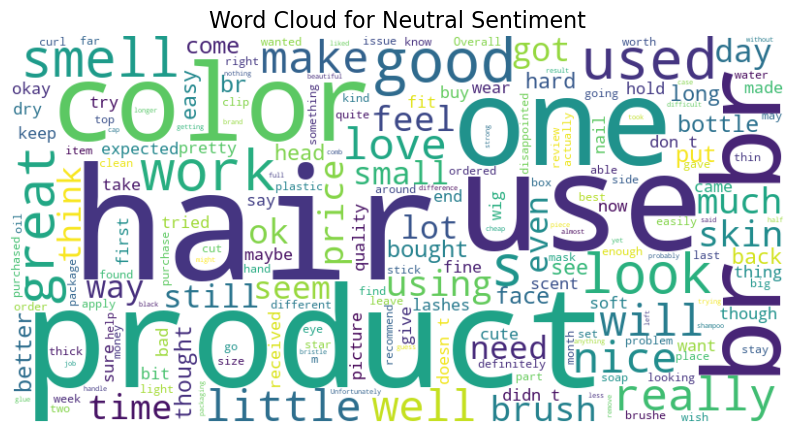

In [28]:
# Generate word clouds for each sentiment
for sentiment in df['sentiment'].unique():
    generate_word_cloud(df, sentiment)

## Data Preprocessing Steps
After normalizing the dataset, the next step is to preprocess the data to prepare it for machine learning or deep learning models.

## Resampling Techniques
- Oversampling Minority Classes: Duplicate or synthetically generate samples for neutral and negative classes to balance the dataset (e.g., using SMOTE – Synthetic Minority Oversampling Technique).
- Undersampling Majority Class: Randomly remove samples from the positive class to match the size of the smaller classes.

### Oversampling

In [32]:
# Separate the classes
positive = df[df['sentiment'] == 'positive']
neutral = df[df['sentiment'] == 'neutral']
negative = df[df['sentiment'] == 'negative']

# Oversample the minority classes
neutral_oversampled = resample(neutral,
                               replace=True,  # Sample with replacement
                               n_samples=len(positive),  # Match majority class size
                               random_state=42)

negative_oversampled = resample(negative,
                                replace=True,
                                n_samples=len(positive),
                                random_state=42)

# Combine all classes and create a new dataframe
# Concatenate while selecting specific columns
df_balanced = pd.concat([
    positive[['text', 'sentiment']],
    neutral_oversampled[['text', 'sentiment']],
    negative_oversampled[['text', 'sentiment']]
])


print(f'The shape of the new dataframe is {df_balanced.shape}')

# Check new distribution
print(df_balanced['sentiment'].value_counts())

The shape of the new dataframe is (1500321, 2)
sentiment
positive    500107
neutral     500107
negative    500107
Name: count, dtype: int64


In [33]:
df_balanced.head()

,text,sentiment
0,This spray is really nice. It smells really go...,positive
1,"This product does what I need it to do, I just...",positive
2,"Smells good, feels great!",positive
4,Love it,positive
5,The polish was quiet thick and did not apply s...,positive


In [34]:
# Check the columns
print(df_balanced.columns)

Index(['text', 'sentiment'], dtype='object')


In [35]:
df_balanced['text'][50]

"Great multi pack of bands for a great price. They wash well in the laundry and don't lose any elasticity"

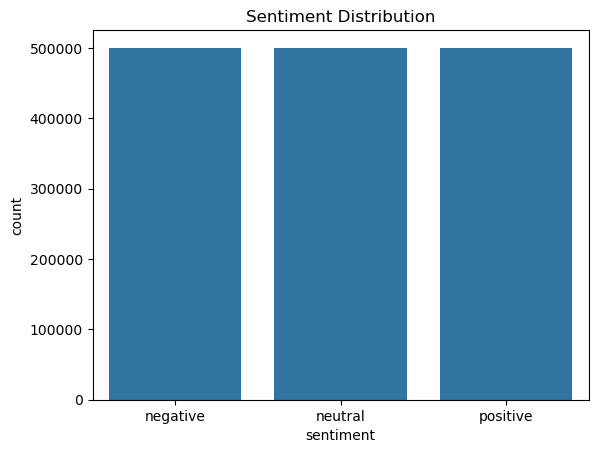

In [36]:
sns.countplot(data=df_balanced, x='sentiment', order=['negative', 'neutral', 'positive'])
plt.title("Sentiment Distribution")
plt.show()

### Lowercase Text

In [38]:
df_balanced['text'] = df_balanced['text'].str.lower()
print (df_balanced['text'].head(5))
df_balanced['text'][50]

0    this spray is really nice. it smells really go...
1    this product does what i need it to do, i just...
2                            smells good, feels great!
4                                              love it
5    the polish was quiet thick and did not apply s...
Name: text, dtype: object


"great multi pack of bands for a great price. they wash well in the laundry and don't lose any elasticity"

### Clean Text

In [40]:
# Text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply cleaning to the text column
df_balanced['text'] = df_balanced['text'].apply(clean_text)
print (df_balanced['text'][50])

great multi pack of bands for a great price they wash well in the laundry and dont lose any elasticity


### Tokenization
Split the cleaned text into individual words using punkt resource from NLTK. The punkt resource is a pre-trained tokenizer model provided by the Natural Language Toolkit (NLTK) library in Python. It is used for splitting text into sentences (sentence tokenization) and words (word tokenization).


In [42]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nepal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# Apply tokenization to each row in the 'text' column
df_balanced['text'] = df_balanced['text'].apply(lambda x: word_tokenize(str(x)))
print(type(df_balanced['text'][50]))  # Check the type of the first element
print(df_balanced['text'][50])        # Inspect the content of the first element

<class 'list'>
['great', 'multi', 'pack', 'of', 'bands', 'for', 'a', 'great', 'price', 'they', 'wash', 'well', 'in', 'the', 'laundry', 'and', 'dont', 'lose', 'any', 'elasticity']


### Remove Stopwords
Stopwords are common words in a language that are filtered out in text processing because they provide little or no meaningful information for tasks like text analysis or machine learning. Removing stopwords helps focus on the meaningful words in the text, improving the performance of machine learning models or text-based analyses.

Examples of stopwords in English include: "the", "is", "and", "a", "an", "in", "on". NLTK has provided a method that provides a predefined list of common stopwords for the English language.

In [45]:
# set() function converts the stopwords list into a set.
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df_balanced['text'] = df_balanced['text'].apply(remove_stopwords)
print(df_balanced['text'][50])        # Inspect the content of the first element

['great', 'multi', 'pack', 'bands', 'great', 'price', 'wash', 'well', 'laundry', 'dont', 'lose', 'elasticity']


In [46]:
df_balanced.tail(5)

,text,sentiment
667422,"[would, give, less, one, possible, went, right...",negative
450951,"[plastic, could, break, using, hair, brushes, ...",negative
608460,"[cubre, el, rostro, lo, suficiente]",negative
442196,"[worst, thing, ever]",negative
31273,"[felt, like, im, rubbing, mud, face, didnt, go...",negative


In [47]:
print(df_balanced.loc[608460, 'text'])

608460    [cubre, el, rostro, lo, suficiente]
608460    [cubre, el, rostro, lo, suficiente]
608460    [cubre, el, rostro, lo, suficiente]
608460    [cubre, el, rostro, lo, suficiente]
Name: text, dtype: object


This is spanish which means there are other languages in this dataset.

In [49]:
# Save the DataFrame to a CSV file
df_balanced.to_csv('df_balanced.csv', index=False, encoding='utf-8')

print("DataFrame successfully saved to 'df_balanced.csv'")

DataFrame successfully saved to 'df_balanced.csv'


In [50]:
print(df_balanced.loc[608460, 'text'])

608460    [cubre, el, rostro, lo, suficiente]
608460    [cubre, el, rostro, lo, suficiente]
608460    [cubre, el, rostro, lo, suficiente]
608460    [cubre, el, rostro, lo, suficiente]
Name: text, dtype: object


### Contractions
As observed, there are words written in short form like 'I'm' instead of 'I am' which should be treated.

Python's contractions library is used to handle contractions effectively.
- It makes the text more standardized and easier for models to process.
- Helps improve sentiment analysis because "I'm" and "I am" would otherwise be treated as different words, leading to inconsistencies.

In [52]:
def convert_to_string(x):
    if isinstance(x, list):
        return ' '.join(x)
    return x

df_balanced['text'] = df_balanced['text'].apply(convert_to_string)


# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply to the text column
df_balanced['text'] = df_balanced['text'].apply(expand_contractions)

# Example
print(expand_contractions("I'm learning NLP. It's awesome!"))
print(expand_contractions("It's gon na be alright!"))

I am learning NLP. It is awesome!
It is gon na be alright!


In [53]:
df_balanced['text'][50]

'great multi pack bands great price wash well laundry do not lose elasticity'

### Lemmatization
Lemmatization reduces words to their dictionary base or root form while considering the context and meaning. It also uses uses Part-of-Speech (POS) tagging to handle words more accurately. Sentiment analysis often involves nuanced expressions, and preserving the meaning of words is crucial for correct classification, especially in multi-class settings which is why lemmatization is used than stemming.

This helps models like LogisticRegression, MultinomialNB, and LinearSVC, which rely heavily on word features, to maintain meaningful distinctions.

In [55]:
# WordNet is a large, structured database of English words, including their meanings, synonyms, antonyms, and relationships.
# It is used by the WordNetLemmatizer to find the base or dictionary form of words during lemmatization.
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]  # Apply lemmatization for each word
    return ' '.join(words)

# the text column contain lists (tokenized words) instead of plain text, and need to convert them back into a readable string format for further processing.
# Convert list to string 
df_balanced['text'] = df_balanced['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
print (df_balanced['text'].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nepal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    spray really nice smells really good goes real...
1    product need wish odorless soft coconut smell ...
2                              smells good feels great
4                                                 love
5    polish quiet thick apply smoothly let dry over...
Name: text, dtype: object


In [56]:
df_balanced['text'][50]

'great multi pack bands great price wash well laundry do not lose elasticity'

### Fix Spelling

In [90]:
df_balanced['text'][50]

'great multi pack bands great price wash well laundry do not lose elasticity'

In [92]:
df_balanced['text'] = df_balanced['text'].apply(convert_to_string)

In [ ]:
# Save the DataFrame to a CSV file
df_balanced.to_csv('df_balanced.csv', index=False)

In [19]:
df_balanced = pd.read_csv ('./df_balanced.csv')

df_balanced.head()

,text,sentiment
0,"['spray', 'really', 'nice', 'smells', 'really'...",positive
1,"['product', 'need', 'wish', 'odorless', 'soft'...",positive
2,"['smells', 'good', 'feels', 'great']",positive
3,['love'],positive
4,"['polish', 'quiet', 'thick', 'apply', 'smoothl...",positive


### Label Encoding

In [21]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the sentiment labels
df_balanced['sentiment_encoded'] = label_encoder.fit_transform(df_balanced['sentiment'])

# Display the mapping of labels to numbers
print("Label encoding mapping:")
for label, num in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {num}")

Label encoding mapping:
negative: 0
neutral: 1
positive: 2


In [23]:
df_balanced.head()

,text,sentiment,sentiment_encoded
0,"['spray', 'really', 'nice', 'smells', 'really'...",positive,2
1,"['product', 'need', 'wish', 'odorless', 'soft'...",positive,2
2,"['smells', 'good', 'feels', 'great']",positive,2
3,['love'],positive,2
4,"['polish', 'quiet', 'thick', 'apply', 'smoothl...",positive,2


### Split data

In [25]:
X = df_balanced['text']         # Feature: review text
y = df_balanced['sentiment_encoded']    # Target label: sentiment

# 80% training, 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% test 70% train

### Vectorization
Vectorization converts text into numerical representations that these models can understand.
Vectorization is performed in the text data (independent variables) that models use to learn patterns and make predictions.
Text data is X_train and X_test.

#### Tf-IDF Vectorization

TF-IDF scales word frequencies based on their importance in the document (via term frequency) and in the corpus (via inverse document frequency). It handles common word dominance better than count vectorization. 


It works well with linear models like SVM and Logistics Regression as they perform in high-dimensional spaces and rely on feature scaling to identify the most important features.

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Standard Scaling for models like SVM and KNN

In [44]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize MaxAbsScaler
scaler = MaxAbsScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

#### Count Vectorization

Count Vectorization converts text into a matrix of word counts. It is suitable for simple text analysis.

It is suitable for model like Naive Bayes since it does not scale word frequencies as TF-IDF does.The model relies purely on the counts for simple and efficient probability calculations.

In [31]:
count_vectorizer = CountVectorizer(min_df = 50, #A term must appear in at least 50 documents to be considered.
                                   ngram_range = (1,2), #Specifies the range of n-grams to be extracted.
                                   strip_accents='unicode', #Removes accents from characters by converting them to their closest ASCII representation.
                                   binary=False)
# Fit and transform on training data that creates a numerical matrix based on the learned vocabulary.
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform test data using the same vocabulary
X_test_count = count_vectorizer.transform(X_test)

In [32]:
print(f"Number of features: {len(count_vectorizer.get_feature_names_out())}") 
print(f"Show some feature names: {count_vectorizer.get_feature_names_out()[::1000]}")

Number of features: 55858
Show some feature names: ['aa' 'also smell' 'arrived dried' 'beard comb' 'blender' 'bright white'
 'buy time' 'childrens' 'colors ordered' 'could purchase' 'day fell'
 'dies' 'double size' 'eminence' 'excelent' 'fake like' 'first look'
 'fuzzy' 'glow dark' 'got sister' 'hair evenly' 'hard come' 'honestly say'
 'impressed results' 'july' 'lavendar' 'like images' 'lobe'
 'love cleanser' 'makeup well' 'minutes tried' 'nail used' 'nice wide'
 'one either' 'overall ok' 'personally fan' 'powdery' 'product looks'
 'put oil' 'really wish' 'return use' 'scent actually' 'sewn together'
 'size shampoo' 'smells good' 'spray tan' 'streak' 'talk' 'thing pretty'
 'tinted' 'turn way' 'use pliers' 'velvety' 'wear get' 'wig make'
 'worth buying']


### Model Training

### Naive Bayes with Count Vectorizer

In [33]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

MultinomialNB()

#### Classification Report of Naive Bayes

In [34]:
# Evaluate Naive Bayes
y_pred_nb = nb_model.predict(X_test_count)
print(classification_report(y_test, y_pred_nb)) #to print precision, recall, F1-score, and support for each sentiment class.

              precision    recall  f1-score   support

           0       0.75      0.73      0.74    100026
           1       0.66      0.65      0.66    100567
           2       0.79      0.82      0.80     99472

    accuracy                           0.73    300065
   macro avg       0.73      0.73      0.73    300065
weighted avg       0.73      0.73      0.73    300065



#### Confusion Matrix of Naive Bayes

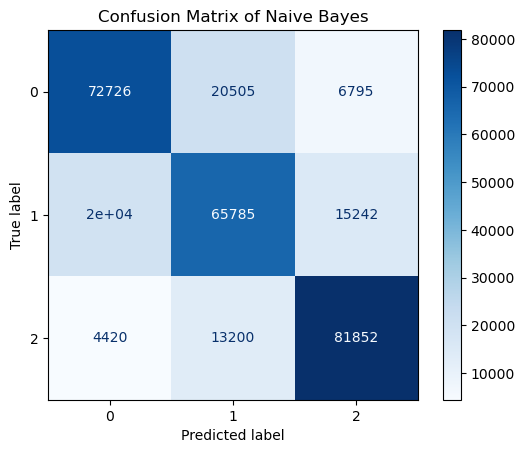

In [35]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
    
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Uses blue shades
plt.title(f"Confusion Matrix of Naive Bayes")
plt.show()

### Logistic Regression with TF-IDF Vectorizer

In [36]:
print("Logistic Regression:")
lr_model = LogisticRegression(multi_class='multinomial',
                              solver='lbfgs', 
                              max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

Logistic Regression:


LogisticRegression(max_iter=1000, multi_class='multinomial')

#### Classification Report of Logistic Regression

In [37]:
y_pred_lr = lr_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73    100026
           1       0.64      0.62      0.63    100567
           2       0.79      0.80      0.79     99472

    accuracy                           0.72    300065
   macro avg       0.71      0.72      0.71    300065
weighted avg       0.71      0.72      0.71    300065



#### Confusion Matrix of Logistic Regression

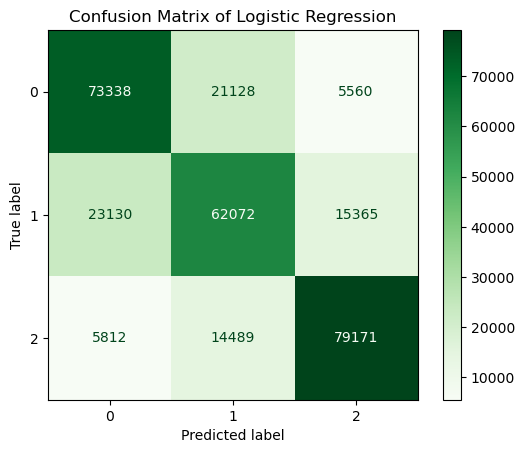

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
    
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix of Logistic Regression")
plt.show()

In [40]:
# Predict probabilities for each class
y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]  # Shape: [n_samples, n_classes]
y_pred_proba

array([0.01069292, 0.19719567, 0.12036059, ..., 0.28912996, 0.6676944 ,
       0.39197757])

### SVM with TF-IDF Vectorizer

In [42]:
from sklearn.calibration import CalibratedClassifierCV

In [65]:
# Train LinearSVC with calibration for probabilities
linear_svc = LinearSVC(C=1.0, max_iter=1000, random_state=42)
calibrated_svc = CalibratedClassifierCV(linear_svc, method="sigmoid")
calibrated_svc.fit(X_train_scaled, y_train)

CalibratedClassifierCV(estimator=LinearSVC(random_state=42))

Here, CalibratedClassifierCV wraps the LinearSVC to enable probability predictions using the sigmoid method. This is necessary because LinearSVC doesn't provide probabilities.

In [47]:
# Make predictions on test data and get probabilities
y_pred_svc = calibrated_svc.predict(X_test_scaled)
y_pred_proba = calibrated_svc.predict_proba(X_test_scaled)

In [48]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72    100026
           1       0.64      0.59      0.62    100567
           2       0.78      0.80      0.79     99472

    accuracy                           0.71    300065
   macro avg       0.71      0.71      0.71    300065
weighted avg       0.71      0.71      0.71    300065



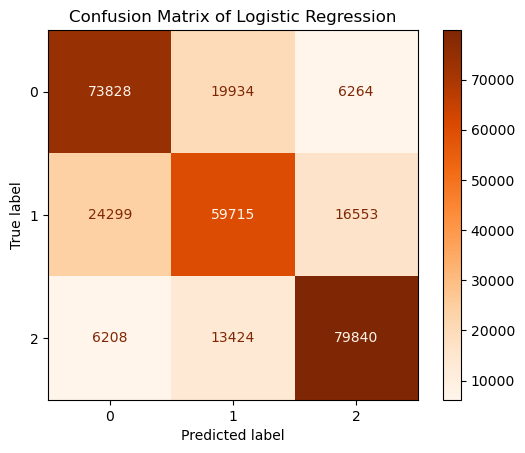

In [49]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
    
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges,  values_format='d') # 'd' ensures integer format
plt.title(f"Confusion Matrix of Logistic Regression")
plt.show()

### ROC-AUC Curve

In [50]:
def plot_roc_curve(y_test, y_pred_proba, model_name, classes):
    # Initialize plot variables
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and AUC for each class
    for i, class_label in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == class_label, y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test == class_label, y_pred_proba[:, i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i, class_label in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {class_label} (AUC = {roc_auc[i]:.2f})")

    # Plot diagonal line (random guess)
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [ ]:
classes = [0, 1, 2]

#### Naive Bayes ROC curve

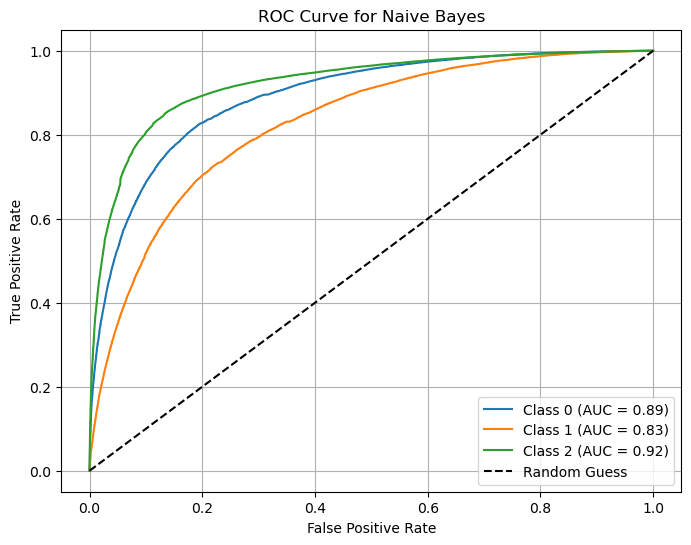

In [51]:
###Naive Bayes ROC
y_pred_proba_nb = nb_model.predict_proba(X_test_count)
plot_roc_curve(y_test, y_pred_proba_nb, "Naive Bayes", classes)

#### Logistic Regression ROC curve

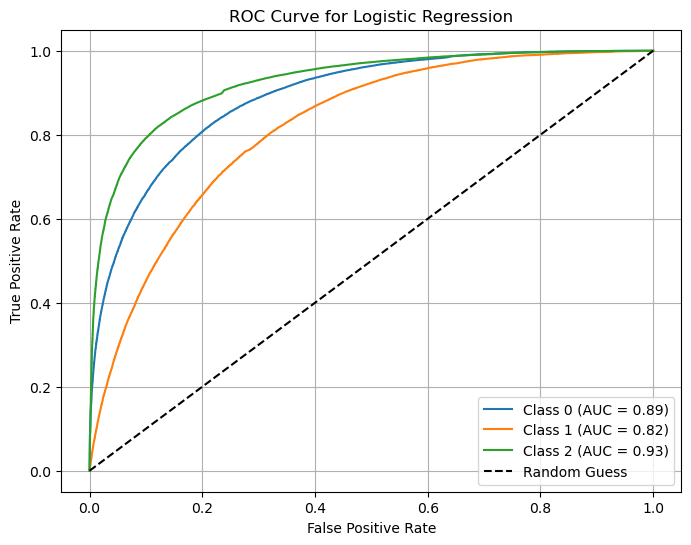

In [52]:
# Logistic Regression ROC
y_pred_proba_lr = lr_model.predict_proba(X_test_tfidf)
plot_roc_curve(y_test, y_pred_proba_lr, "Logistic Regression", classes)

#### SVC ROC curve

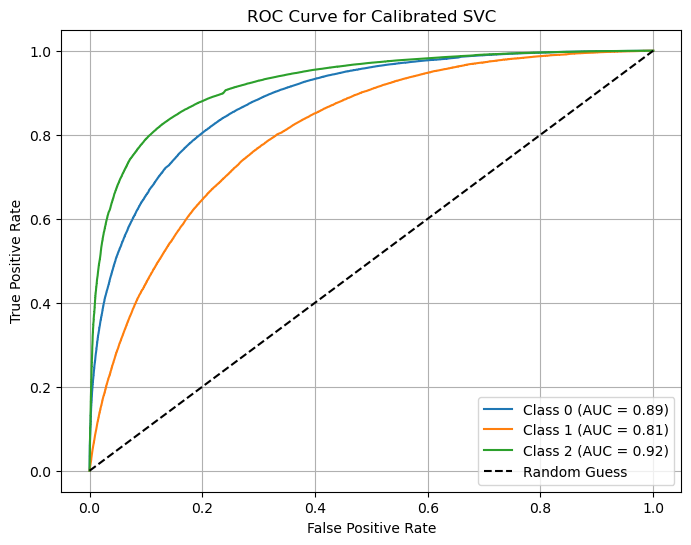

In [53]:
# Calibrated SVC ROC
plot_roc_curve(y_test, y_pred_proba, "Calibrated SVC", classes)

### Conclusion

The coursework delve into training and evaluation of unbalanced and balanced dataset with different vectorization techniques. It shows how the dataset can impact the evalaution of the model.

Following key insights can be derived from the above evaluation from classification report and ROC curve
- Best Model for Positive Sentiments: Logistic Regression (AUC = 0.93) performs slightly better for class 2, indicating excellent classification for positive sentiments.
- Neutral Sentiments Challenge: All models struggle with class 1, with Naive Bayes (AUC = 0.83) slightly outperforming Logistic Regression (AUC = 0.82) and SVM (AUC = 0.81).
- Overall Strengths: All three models perform similarly for class 0 (negative sentiments), with an AUC of 0.89 across the board.


Logistic Regression is the best overall model due to its superior performance for positive sentiments (class 2) and comparable results for the other classes. However, Naive Bayes can be preferred for slightly better performance on neutral sentiments. SVM, while strong in certain cases, struggles with class 1 and is less favorable in this scenario.